# Výzva: Analýza textu o datové vědě

> *V tomto notebooku experimentujeme s použitím různých URL - článku na Wikipedii o strojovém učení. Můžete si všimnout, že na rozdíl od datové vědy tento článek obsahuje mnoho odborných termínů, což analýzu činí problematičtější. Musíme přijít na jiný způsob, jak vyčistit data po extrakci klíčových slov, abychom se zbavili některých častých, ale nevýznamných slovních spojení.*

V tomto příkladu si uděláme jednoduché cvičení, které pokrývá všechny kroky tradičního procesu datové vědy. Nemusíte psát žádný kód, stačí kliknout na buňky níže, abyste je spustili a pozorovali výsledek. Jako výzvu vás povzbuzujeme, abyste tento kód vyzkoušeli s různými daty.

## Cíl

V této lekci jsme diskutovali o různých konceptech souvisejících s datovou vědou. Zkusme objevit další související koncepty pomocí **těžby textu**. Začneme textem o datové vědě, extrahujeme z něj klíčová slova a poté se pokusíme vizualizovat výsledek.

Jako text použiji stránku o datové vědě z Wikipedie:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Krok 1: Získání dat

Prvním krokem v každém procesu datové vědy je získání dat. K tomu použijeme knihovnu `requests`:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Krok 2: Transformace dat

Dalším krokem je převést data do formy vhodné pro zpracování. V našem případě jsme stáhli HTML zdrojový kód ze stránky a potřebujeme jej převést na čistý text.

Existuje mnoho způsobů, jak to lze provést. My použijeme nejjednodušší vestavěný objekt [HTMLParser](https://docs.python.org/3/library/html.parser.html) z Pythonu. Musíme vytvořit podtřídu třídy `HTMLParser` a definovat kód, který bude sbírat veškerý text uvnitř HTML tagů, s výjimkou tagů `<script>` a `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Krok 3: Získávání poznatků

Nejdůležitějším krokem je přeměnit naše data do podoby, ze které můžeme získat poznatky. V našem případě chceme z textu extrahovat klíčová slova a zjistit, která klíčová slova mají větší význam.

Pro extrakci klíčových slov použijeme knihovnu Pythonu nazvanou [RAKE](https://github.com/aneesha/RAKE). Nejprve tuto knihovnu nainstalujeme, pokud již není přítomna:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Hlavní funkčnost je dostupná z objektu `Rake`, který můžeme přizpůsobit pomocí některých parametrů. V našem případě nastavíme minimální délku klíčového slova na 5 znaků, minimální frekvenci klíčového slova v dokumentu na 3 a maximální počet slov v klíčovém slovu na 2. Klidně si pohrajte s jinými hodnotami a sledujte výsledek.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Získali jsme seznam termínů spolu s jejich stupněm důležitosti. Jak můžete vidět, nejrelevantnější obory, jako je strojové učení a velká data, se nacházejí na předních pozicích seznamu.

## Krok 4: Vizualizace výsledku

Lidé nejlépe interpretují data ve vizuální podobě. Proto často dává smysl data vizualizovat, abychom získali určité poznatky. Můžeme použít knihovnu `matplotlib` v Pythonu k vykreslení jednoduchého rozložení klíčových slov s jejich relevancí:


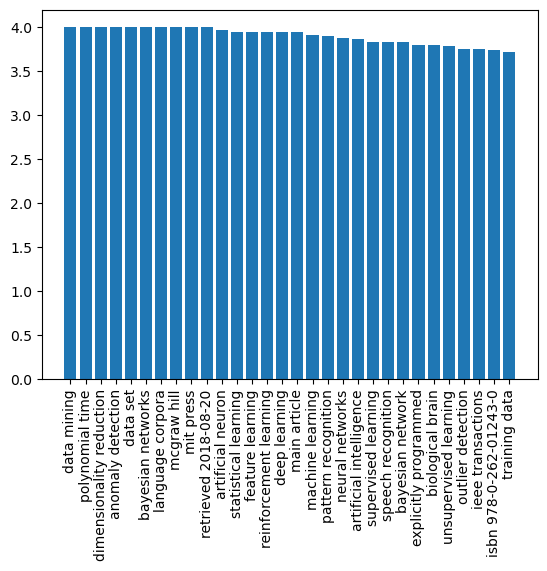

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Existuje však ještě lepší způsob, jak vizualizovat frekvence slov - použití **Word Cloud**. Budeme muset nainstalovat další knihovnu, abychom vytvořili word cloud z našeho seznamu klíčových slov.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` objekt je zodpovědný za přijetí buď původního textu, nebo předem vypočítaného seznamu slov s jejich frekvencemi, a vrací obrázek, který lze následně zobrazit pomocí `matplotlib`:


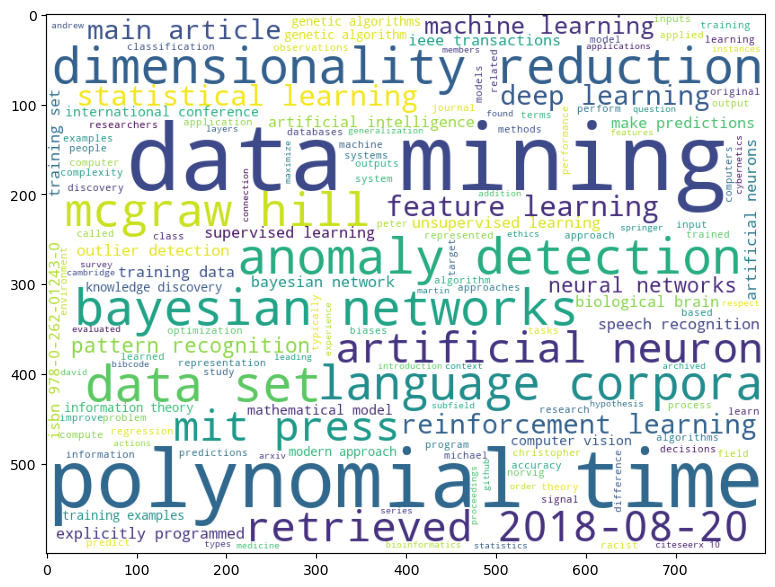

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Můžeme také předat původní text do `WordCloud` - podívejme se, zda dokážeme získat podobný výsledek:


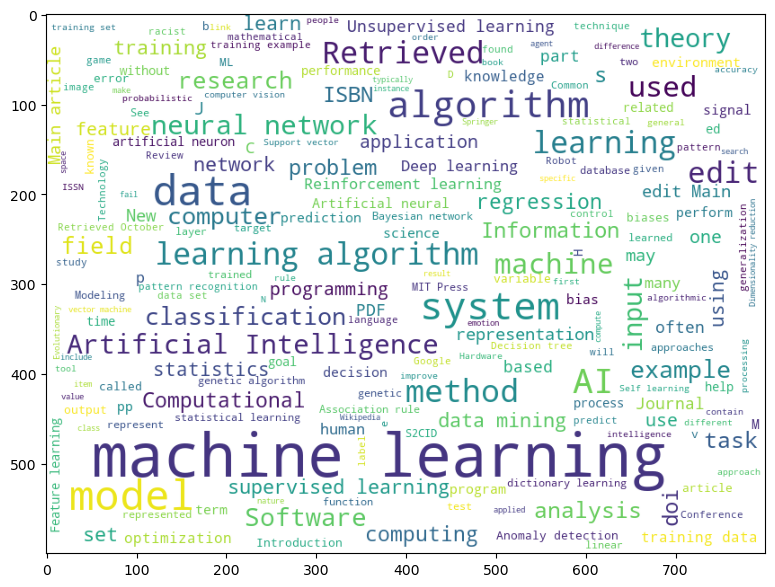

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Můžete vidět, že word cloud nyní vypadá působivěji, ale také obsahuje hodně šumu (např. nesouvisející slova jako `Retrieved on`). Také získáváme méně klíčových slov, která se skládají ze dvou slov, jako například *data scientist* nebo *computer science*. To je proto, že algoritmus RAKE odvádí mnohem lepší práci při výběru vhodných klíčových slov z textu. Tento příklad ilustruje důležitost předzpracování a čištění dat, protože jasný obraz na konci nám umožní dělat lepší rozhodnutí.

V tomto cvičení jsme prošli jednoduchým procesem extrakce určitého významu z textu na Wikipedii, ve formě klíčových slov a word cloudu. Tento příklad je poměrně jednoduchý, ale dobře ukazuje všechny typické kroky, které datový vědec podnikne při práci s daty, od získávání dat až po vizualizaci.

V našem kurzu si všechny tyto kroky podrobně rozebereme.



---

**Prohlášení**:  
Tento dokument byl přeložen pomocí služby pro automatický překlad [Co-op Translator](https://github.com/Azure/co-op-translator). I když se snažíme o přesnost, mějte prosím na paměti, že automatické překlady mohou obsahovat chyby nebo nepřesnosti. Původní dokument v jeho původním jazyce by měl být považován za autoritativní zdroj. Pro důležité informace se doporučuje profesionální lidský překlad. Neodpovídáme za žádné nedorozumění nebo nesprávné interpretace vyplývající z použití tohoto překladu.
